In [1]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

import geopandas
gdf = geopandas.read_file("./utils/ne_10m_admin_0_countries_lakes.shp")[['ADMIN', 'ADM0_A3', 'geometry']]#.to_crs('+proj=robin')
gdf = gdf.rename(columns = {"ADMIN":"Country", "ADM0_A3":"alpha-3"})

dfCounty = pd.read_csv("./utils/ISO-3166-Countries-with-Regional-Codes.csv")

In [2]:
df = pd.read_pickle("data.pkl")
df.head()

,Name,Affiliation,Country,Year,Role,Subcommitte,AffiliationRaw,CountryRaw,WikiDataId,alpha-3,Region,ORCID
0,Johannes Schöning,Universität St.Gallen,Switzerland,2023,Paper Chair,MobileHCI 2023,Universität St.Gallen,Switzerland,,CHE,Europe,DATA-0000-0000-0001
1,Maristella Matera,Polytechnic University of Milan,Italy,2023,Paper Chair,MobileHCI 2023,Politecnico di Milano,Italy,Q392904,ITA,Europe,DATA-0000-0000-0002
2,Luis A. Leiva,University of Luxembourg,Luxembourg,2023,Paper Chair,MobileHCI 2023,University of Luxemburg,Luxembourg,,LUX,Europe,DATA-0000-0000-0003
3,Kening Zhu,None,None,2023,Associate Chair,MobileHCI 2023,NaN,NaN,,NaN,NaN,DATA-0000-0000-0004
4,Kaixing Zhao,None,None,2023,Associate Chair,MobileHCI 2023,NaN,NaN,,NaN,NaN,DATA-0000-0000-0005


In [3]:
dfActiv = df[df.Role != "Assistant"]

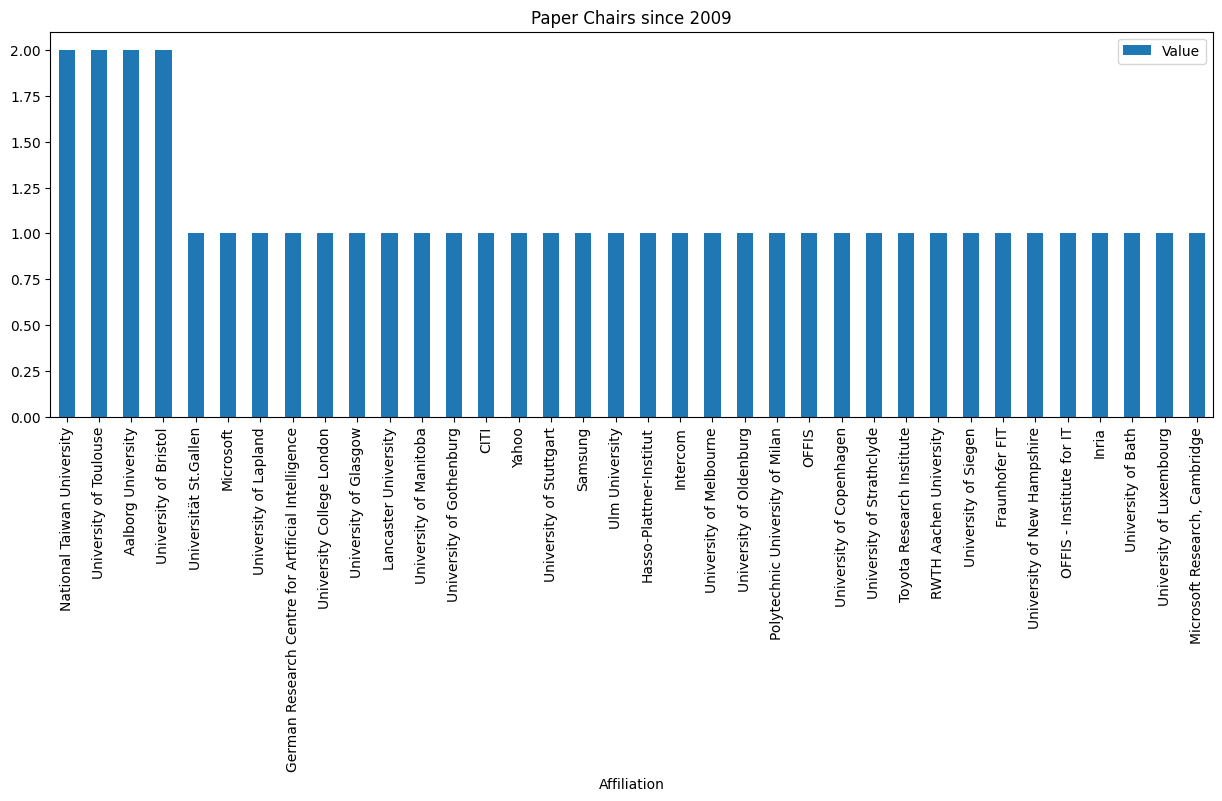

In [8]:
dfPaper = df[df.Role == "Paper Chair"]

value = "Affiliation"
dfC = dfPaper[value].value_counts()
#dfC = df[df[value] != "USA"][value].value_counts()
dfC = dfC.reset_index()
dfC.columns = [value, "Value"]
#dfC = dfC[dfC.Value > 3]
#dfC.Value = dfC.Value/dfC.Value.sum()*100


fig, ax = plt.subplots(figsize=(15, 5))
dfC.set_index("Affiliation").plot(kind="bar", ax=ax)
dfC
plt.title(f"Paper Chairs since {dfPaper.Year.min()}")
plt.show()

In [10]:
dfPaper = df[df.Role == "Subcommittee Chair"]
if len(dfPaper) > 0:
    value = "Affiliation"
    dfC = dfPaper[value].value_counts()
    #dfC = df[df[value] != "USA"][value].value_counts()
    dfC = dfC.reset_index()
    dfC.columns = [value, "Value"]
    dfC = dfC[dfC.Value > 3]
    #dfC.Value = dfC.Value/dfC.Value.sum()*100

    fig, ax = plt.subplots(figsize=(15, 5))
    dfC.set_index("Affiliation").plot(kind="bar", ax=ax)
    dfC
    plt.title(f"Subcommitee Chairs since {dfPaper.Year.min()}")
    plt.show()

In [11]:

dfYears = df.groupby("ORCID").Year.apply(lambda x: list(x)).reset_index()
dfYears = dfYears.rename(columns={"Year":"Years"})

In [12]:
dfYears = df.groupby("Year").Name.count().reset_index()
dfYears = dfYears.rename(columns={"Name":"Count"})

  0%|                                                                                       | 0/238 [00:00<?, ?it/s]

100%|████████████████████████████████████████████████████████████████████████████| 238/238 [00:01<00:00, 138.85it/s]


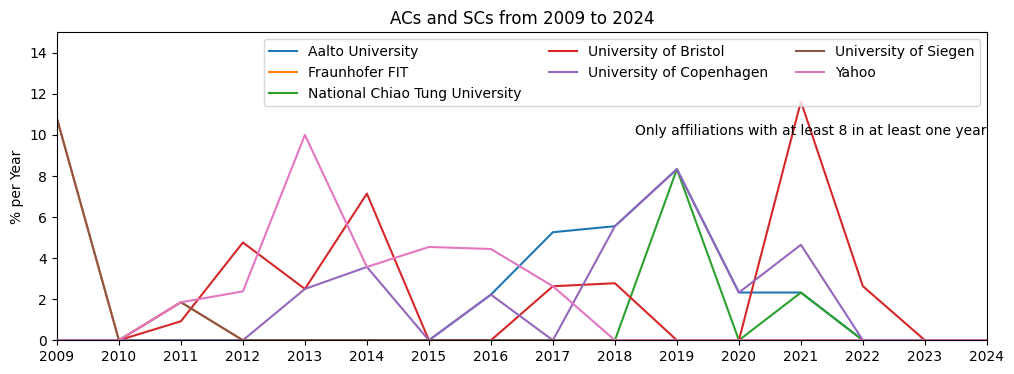

In [16]:
minPercentage = 8
fig, ax = plt.subplots(figsize=(12,4))
#years = list(range(dfActiv.Year.min(), dfActiv.Year.max()+1))
added = 0
for affiliation in tqdm(sorted(dfActiv[dfActiv.Affiliation.isna() == False].Affiliation.unique())):
    count = []
    for year in list(dfYears.Year.values):
        count.append(len(dfActiv[(dfActiv["Affiliation"] == affiliation) & (dfActiv["Year"] == year)]))
    p = count/np.array(list(dfYears.Count))*100
    if (len(p[p>minPercentage]) > 0):
        if (added < 10):
            plt.plot(list(dfYears.Year.values), p, label=affiliation)
        else:
            plt.plot(list(dfYears.Year.values), p, label=affiliation, ls="--")
        added = added + 1
plt.xticks(list(dfYears.Year.values))
#plt.legend(ncol=5)
plt.xlim(dfYears.Year.min(), dfYears.Year.max())
plt.ylim(0,15)
plt.ylabel("% per Year")
plt.title(f"ACs and SCs from {dfYears.Year.min()} to {dfYears.Year.max()}")
plt.text(dfYears.Year.max(),  10, f"Only affiliations with at least {minPercentage} in at least one year", ha="right")
plt.legend(ncol=3, loc="upper right")
plt.show()

In [18]:
#for i, e in df.value_counts("Affiliation").reset_index().sort_values("Affiliation").iterrows():
for i, e in df.value_counts("Affiliation").reset_index().iterrows():
    print(e["Affiliation"], e["count"])

Lancaster University 17
University of Bristol 14
Yahoo 13
University of Glasgow 12
Microsoft 11
University of Copenhagen 11
University of Duisburg-Essen 10
Google 10
Aalto University 10
Aalborg University 8
Hasso-Plattner-Institut 8
University College London 8
University of Manitoba 8
Ulm University 8
University of Melbourne 8
LMU Munich 8
Nokia 7
Mobile Life Center 7
University of Strathclyde 7
Carnegie Mellon University 6
Swansea University 6
Fraunhofer FIT 6
University of Siegen 6
University of Stuttgart 6
University of Udine 5
Telefonica 5
Helsinki Institute for Information Technology 5
University of California, San Diego 5
Korea Advanced Institute of Science & Technology 5
National Taiwan University 5
Stockholm University 5
ETH Zurich 5
University of Lapland 5
Inria 5
University of St Andrews 5
University of Gothenburg 5
University of Hannover 4
Ștefan cel Mare University of Suceava 4
FX Palo Alto Laboratory 4
Georgia Institute of Technology 4
Intel 4
IT University of Copenhagen 4

In [ ]:
df[df.Affiliation =="Google"].value_counts("Country")